<div style="padding:30px;margin:10;font-size:150%;text-align:left;border-radius:10px;background-color:#133a6f;color:white;)"><b><span>Phase I - Dataset Selection and Preperation</span></b> </div>

<b><span style='color:#3f75bb'>|</span> Selected dateset: https://www.kaggle.com/datasets/lykin22/drug-data</b> 

### <b><span style='color:#3F75BB'>|</span> Domain Knowledge</b>

1. **`Age` [categorical] :** Age of the patients

2. **`Sex` [categorical] :** Gender of the patients

3. **`BP` [categorical] :** Blood pressure levels

4. **`Cholesterol` [categorical] :** Cholesterol levels

5. **`Na_to_K` [numerical] :** Sodium to potassium ration in blood

6. **`Drug` [categorical] :** Drug type
<br>

### <b><span style='color:#3F75BB'>|</span> Import libraries</b>

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score

### <b><span style='color:#3F75BB'>|</span> Input data</b>

In [130]:
data = pd.read_csv("~/Desktop/Git-projects/DSTA/drug200.csv")
print(data.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


<div style="padding:30px;margin:10;font-size:150%;text-align:left;border-radius:10px;background-color:#133a6f;color:white;)"><b><span>Phase II - Quality Analysis</span></b> </div>


### <b><span style='color:#3F75BB'>|</span> Data quality check - null and missing values</b>

In [131]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


### <b><span style='color:#3F75BB'>|</span> Data quality check - duplicates</b>

In [132]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 6)


### <b><span style='color:#3F75BB'>|</span> Data quality check - unique value in each columns</b>

In [133]:
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Age: 57 distinct values
Sex: 2 distinct values
BP: 3 distinct values
Cholesterol: 2 distinct values
Na_to_K: 198 distinct values
Drug: 5 distinct values


### <b><span style='color:#3F75BB'>|</span> Data quality check - Rename the value for better understanding</b>

In [134]:
# Create a new column "Age_range" to categorise the age
data['Age_range'] = pd.cut(data['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 120], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60','60-70','70-80','80+'])
print(data['Age_range'].value_counts())

40-50    40
30-40    39
50-60    33
20-30    32
60-70    30
10-20    16
70-80    10
0-10      0
80+       0
Name: Age_range, dtype: int64


<div style="padding:30px;margin:10;font-size:150%;text-align:left;border-radius:10px;background-color:#133a6f;color:white;)"><b><span>Phase III - Dimensional Analysis</span></b> </div>


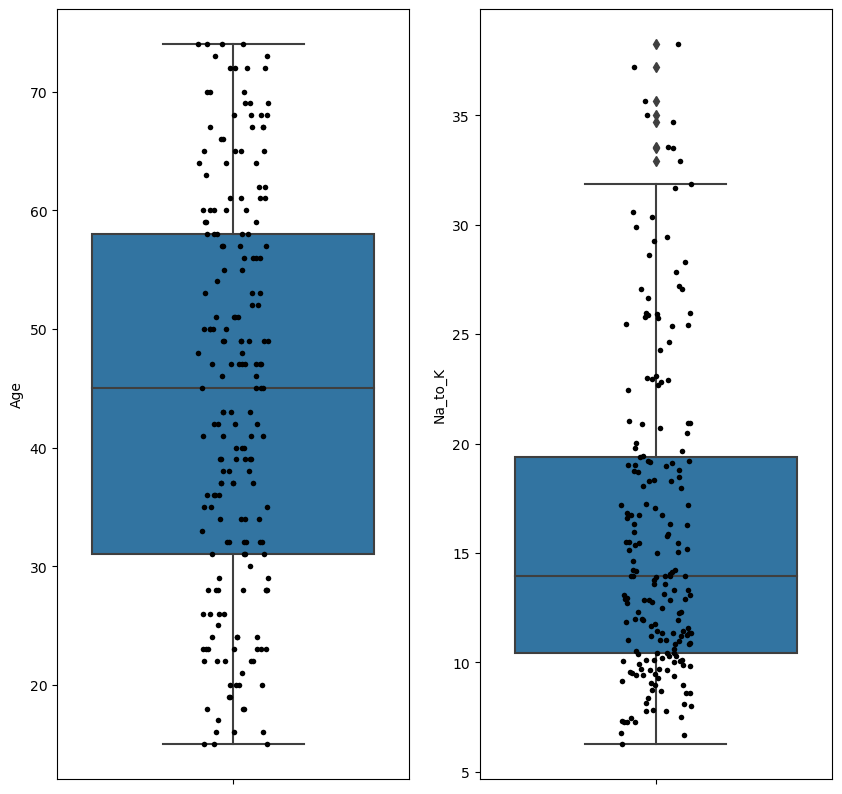

In [135]:
fig, axes = plt.subplots(1, 2, figsize=(10,10))
sns.boxplot(ax=axes[0], data=data, y='Age')
sns.stripplot(ax=axes[0], data=data, y="Age", size=4, color="0")
sns.boxplot(ax=axes[1], data=data, y='Na_to_K')
sns.stripplot(ax=axes[1], data=data, y="Na_to_K", size=4, color="0")
plt.show()

<b><span style='color:#3F75BB'>-</span> Findings</b>
- All numerical columns(age and Na_to_K) are distributed equally, no obvious spikes.
<br>

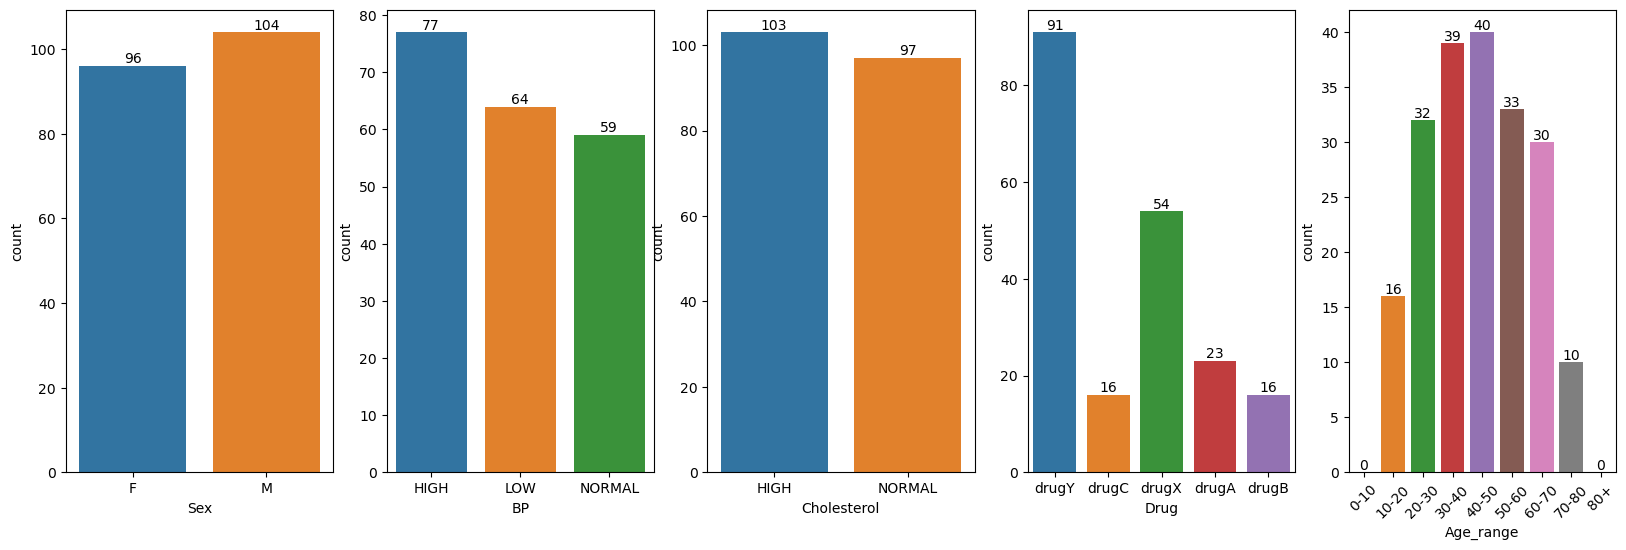

In [136]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
ax0 = sns.countplot(ax=axes[0], data=data, x='Sex')
ax1 = sns.countplot(ax=axes[1], data=data, x='BP')
ax2 = sns.countplot(ax=axes[2], data=data, x='Cholesterol')
ax3 = sns.countplot(ax=axes[3], data=data, x='Drug')
ax4 = sns.countplot(ax=axes[4], data=data, x='Age_range')
for item in ax4.get_xticklabels():
    item.set_rotation(45)
ax0.bar_label(ax0.containers[0])
ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0])
ax3.bar_label(ax3.containers[0])
ax4.bar_label(ax4.containers[0])
plt.show()

<b><span style='color:#3F75BB'>-</span> Findings</b>
- Categorised columns(Sex, BP, and Cholesterol) are distributed equally. 
- Most of the "Drug" column has the value "drug Y", but since Drug column will be the predicted column, this won't be a big issue.

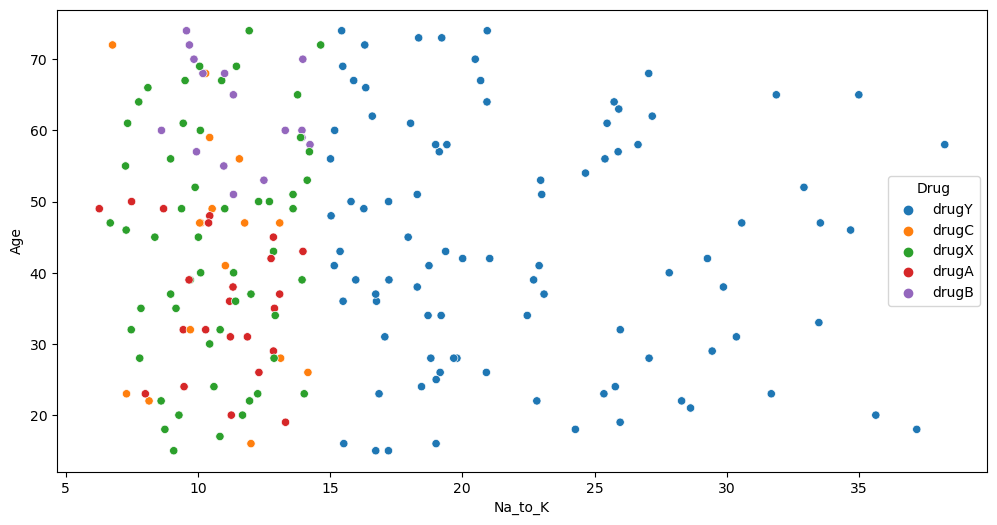

In [137]:
#create a sns distribution plot
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=data, y="Age", x="Na_to_K", hue="Drug", ax=ax)
plt.show()


<div style="padding:30px;margin:10;font-size:150%;text-align:left;border-radius:10px;background-color:#133a6f;color:white;)"><b><span>Phase IV - Data Forecasting</span></b> </div>

### <b><span style='color:#3F75BB'>|</span> Select predictors and forecast column</b>


Select three most important dimensions as predictors of a fourth dimension to be predicted.
- Selected 3 predictors: Age, BP, Na_to_K
- Selected dimension to be predicted: Drug

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       0.67      1.00      0.80         4
           3       0.90      0.90      0.90        10
           4       1.00      0.88      0.94        17

    accuracy                           0.93        40
   macro avg       0.91      0.96      0.93        40
weighted avg       0.94      0.93      0.93        40



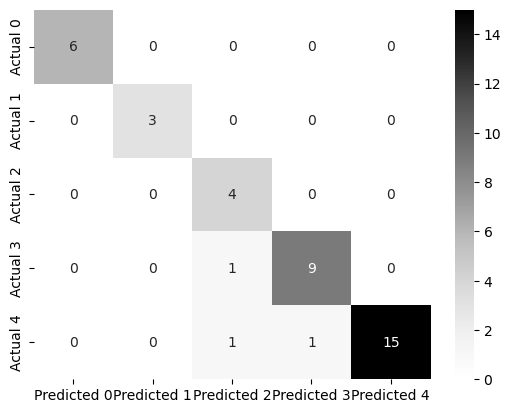

In [138]:
#Relabel the categorised column into numerical format
le = LabelEncoder()
data['BP'] = le.fit_transform(data["BP"])
data['Sex'] = le.fit_transform(data["Sex"])
data['Cholesterol'] = le.fit_transform(data["Cholesterol"])
data['Drug'] = le.fit_transform(data['Drug'])

#Speficy the predictor columns(as x), and the predicted column(as y)
x = np.array(data[['Age', 'BP', 'Na_to_K']])
y = np.array(data[["Drug"]])
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

#Standardising data
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

#Use the KNN classifier for the prediction
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train.ravel())
Y_pred = classifier.predict(X_test)

#Print the result of the prediction
print(classification_report(Y_test, Y_pred))
labels = unique_labels(Y_test)
col = [f'Predicted {label}' for label in labels]
ind = [f'Actual {label}' for label in labels]
table = pd.DataFrame(confusion_matrix(Y_test, Y_pred), columns=col, index=ind)
sns.heatmap(table, annot=True, fmt='d', cmap='Greys')
plt.show()



<b><span style='color:#3F75BB'>-</span> Findings</b>
- The KNN classifier with our predictors can come up with a 80~90% accuracy result.

### <b><span style='color:#3F75BB'>|</span> Principal Component Analyse</b>

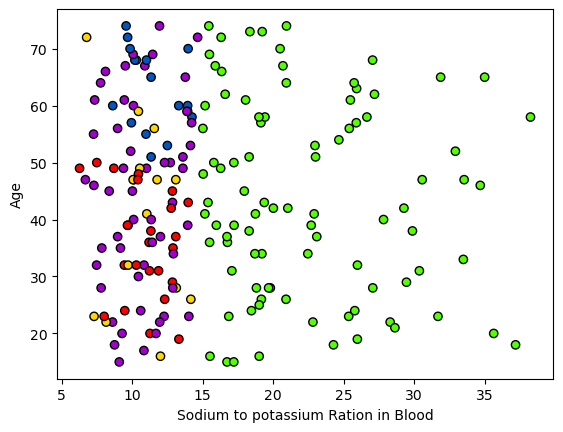

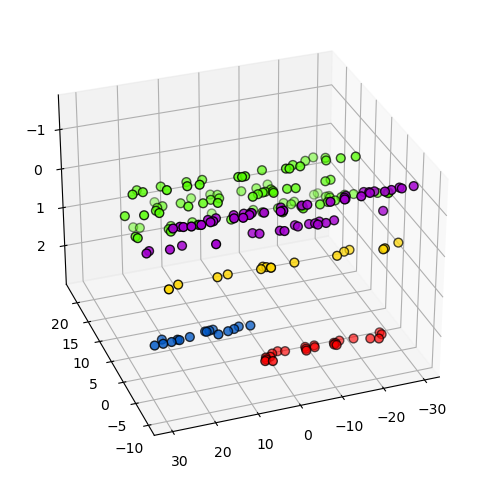

In [139]:
#Create a scatter plot by using the two predictors used in phase 3, separate the Drug column value by using different colors.
plt.figure(2)
plt.clf()
plt.scatter(data[['Na_to_K']], data[["Age"]], c=y, cmap="prism", edgecolor="k")
plt.xlabel("Sodium to potassium Ration in Blood")
plt.ylabel("Age")


#Dimensionality reduction using PCA method with the 3+1 dimensions.
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data[['BP', 'Age', 'Na_to_K', 'Drug']])

#Create a 3D scatter plot using the result of the PCA, separate the Drug column value by using different colors.
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    X_pca[:, 2],
    c=y,
    cmap='prism',
    edgecolor="k",
    s=40,
)

plt.show()

<b><span style='color:#3F75BB'>-</span> Findings</b>
- It is obvious that after using PCA to generate new dimensions, the scatter plot is more effective in distinguishing the Drug column value.

### <b><span style='color:#3F75BB'>|</span> Result and Diccussion</b>

1. What motivated your choice of those three predictor dimension?
    The reason why I chose Age, BP, and Na_to_K is because Age and Na_to_K columns are numeric from the beginning, and BP column have the most categorised value among all other columns. Scattered data can help us segment groups and make predictions more effectively.
2. Are there alternatives that could be explored?
    In this case, since we already used all the numeric columns(Age and Na_to_K), there won't be a big difference if we change the third column to another categorised column. But consider using the PCA dimensions might be a better solution.
3. Do your selection and the PCA provide a “good” dimensionality reduction?
    In Phase 3, The result of the KNN classifier have the accuracy of more than 80%, which is already a good prediction, but after exploring the dimensions of PCA, it turned out that these dimensions generated by PCA might give us better predictions, more detailed as follows.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       0.75      0.60      0.67         5
           3       0.75      0.90      0.82        10
           4       1.00      0.94      0.97        17

    accuracy                           0.90        40
   macro avg       0.90      0.89      0.89        40
weighted avg       0.91      0.90      0.90        40



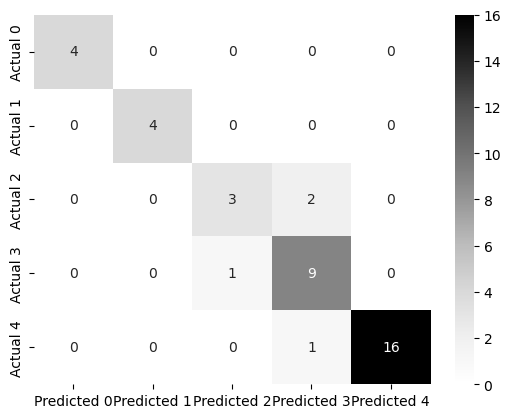

In [140]:
#Dimensionality reduction using PCA method with the selected 3 dimensions.
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data[['BP', 'Age', 'Na_to_K']])
y = np.array(data[["Drug"]])
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size = 0.2)

#Standardising data
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

#Use the KNN classifier for the prediction
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train.ravel())
Y_pred = classifier.predict(X_test)

#Print the result of the prediction
print(classification_report(Y_test, Y_pred))
labels = unique_labels(Y_test)
col = [f'Predicted {label}' for label in labels]
ind = [f'Actual {label}' for label in labels]
table = pd.DataFrame(confusion_matrix(Y_test, Y_pred), columns=col, index=ind)
sns.heatmap(table, annot=True, fmt='d', cmap='Greys')
plt.show()

<b><span style='color:#3F75BB'>-</span> Findings</b>
- When we replace the KNN predictors with PCA dimensions, the predictions(accuracy) seem to improve.

### <b><span style='color:#3F75BB'>|</span> Ｃomparison before and after PCA</b>

    Original   PCA  % Difference
0       90.0  82.5         -8.33
1       80.0  75.0         -6.25
2       85.0  80.0         -5.88
3       85.0  77.5         -8.82
4       87.5  92.5          5.71
..       ...   ...           ...
95      90.0  87.5         -2.78
96      90.0  75.0        -16.67
97      80.0  82.5          3.12
98      87.5  85.0         -2.86
99      95.0  87.5         -7.89

[100 rows x 3 columns]
----------------------------------------
         Original         PCA  % Difference
count  100.000000  100.000000    100.000000
mean    82.750000   82.775000      0.500600
std      5.735104    6.101985     10.046383
min     70.000000   65.000000    -23.680000
25%     80.000000   80.000000     -6.300000
50%     82.500000   83.750000      0.000000
75%     87.500000   87.500000      6.300000
max     95.000000   97.500000     28.570000
----------------------------------------
Average accuracy over 100 runs:
 - Original accuracy: 82.75%
 - PCA accuracy: 82.775%
 - % Difference:

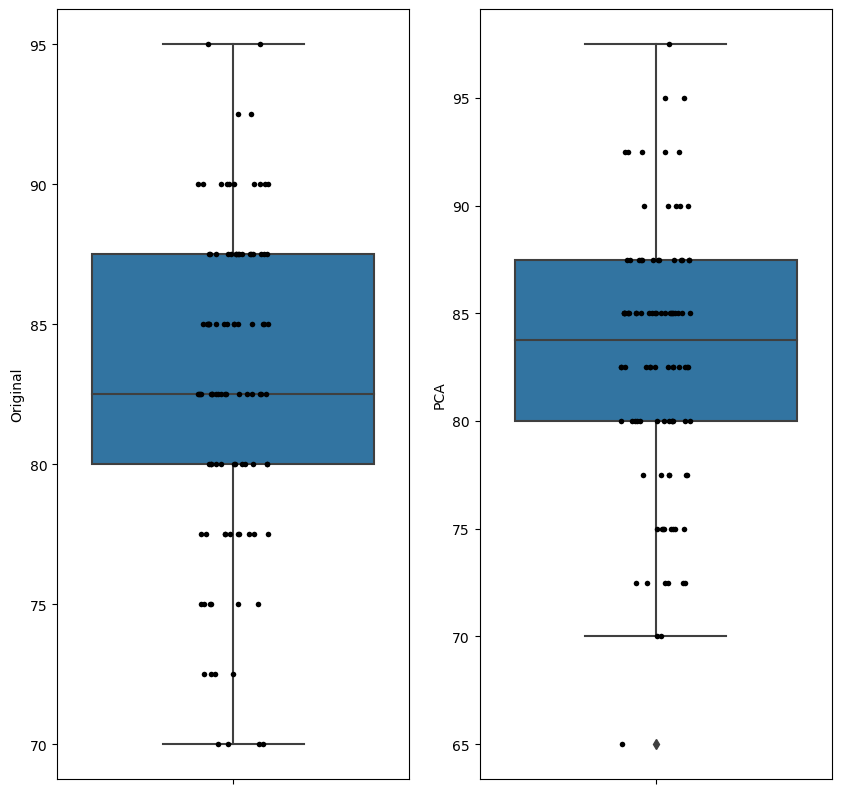

In [161]:
#Dimensionality reduction using PCA method with the selected 3 dimensions.
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data[['BP', 'Age', 'Na_to_K']])

x = np.array(data[['Age', 'BP', 'Na_to_K']])
y = np.array(data[["Drug"]])

accuracy_record = pd.DataFrame(columns = ['Original', 'PCA', '% Difference'])
#Run the prediction for 100 times
for i in range(100):

    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)
    pcaX_train, pcaX_test, pcaY_train, pcaY_test = train_test_split(X_pca, y, test_size = 0.2)

    #Standardising data
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)

    #Use the KNN classifier for the prediction
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, Y_train.ravel())
    Y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)*100

    #Standardising data
    pcaX_train = StandardScaler().fit_transform(pcaX_train)
    pcaX_test = StandardScaler().fit_transform(pcaX_test)

    #Use the KNN classifier for the prediction
    pcaClassifier = KNeighborsClassifier(n_neighbors=5)
    pcaClassifier.fit(pcaX_train, pcaY_train.ravel())
    pcaY_pred = pcaClassifier.predict(pcaX_test)
    pcaAccuracy = accuracy_score(pcaY_test,pcaY_pred)*100

    #Calculate the difference between PCA and original dimensions
    diff = pcaAccuracy/accuracy

    #Append the records to the record dataframe
    new = pd.DataFrame({'Original' : [accuracy], 'PCA' : [pcaAccuracy], '% Difference' : [round((pcaAccuracy/accuracy-1)*100, 2)]})
    accuracy_record = pd.concat([accuracy_record, new], ignore_index=True)

#Print the accuracy data
print(accuracy_record)
og_m = accuracy_record['Original'].mean()
pca_m = accuracy_record['PCA'].mean()
print('----------------------------------------')
print(accuracy_record.describe())
print('----------------------------------------')
print('Average accuracy over 100 runs:')
print(f' - Original accuracy: {og_m}%')
print(f' - PCA accuracy: {pca_m}%')
print(f' - % Difference: {round((pca_m/og_m-1)*100, 2)}%')

#Create the graph of box plot and strip plot for both PCA and original dimensions result.
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
sns.boxplot(ax=axes[0], data=accuracy_record, y='Original')
sns.stripplot(ax=axes[0], data=accuracy_record, y="Original", size=4, color="0")
sns.boxplot(ax=axes[1], data=accuracy_record, y='PCA')
sns.stripplot(ax=axes[1], data=accuracy_record, y="PCA", size=4, color="0")
plt.show()

<b><span style='color:#3F75BB'>-</span> Findings</b>
- The program uses both PCA dimensions and the 3 dimensions I chose, and run the same KNN prediction for 100 times. As a result, the PCA dimension performs better than the original dimensions at the lowest accuracy, 25%, 50%, and 75% accuracy.